# R example

### Code by [Tom McCauley](https://github.com/tpmccauley) | Notebook by [Achintya Rao](https://github.com/RaoOfPhysics)


Code source: https://github.com/tpmccauley/opendata-histograms/ (The code has been modified for this example.)

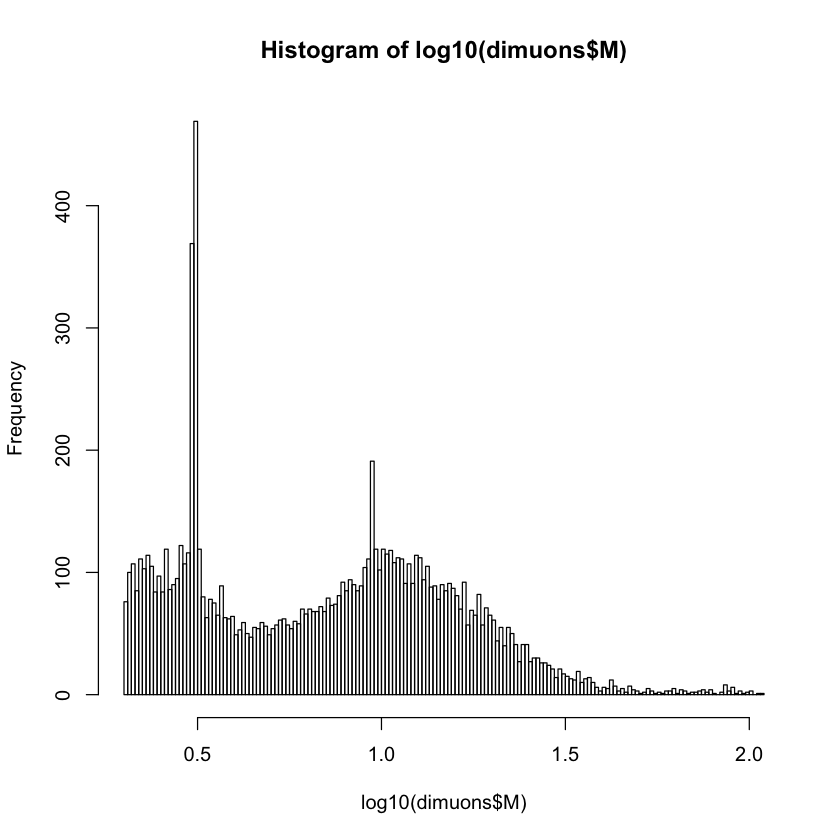

In [1]:
# read in the dimuon csv file:
dimuons <- read.csv(file="data/MuRun2010B_0.csv")

# select for events where the 2 muons have opposite-sign
dimuons.oppsigns <- subset(dimuons, dimuons$Q1*dimuons$Q2 == -1)

# and then from those, select events with 2 global muons
dimuons.globals <- subset(dimuons.oppsigns, dimuons.oppsigns$Type1 == "G" & dimuons.oppsigns$Type2 == "G")

# set the number of bins
nbins <- 200

# and make a histogram:
hist.data <- hist(log10(dimuons$M), breaks=nbins)

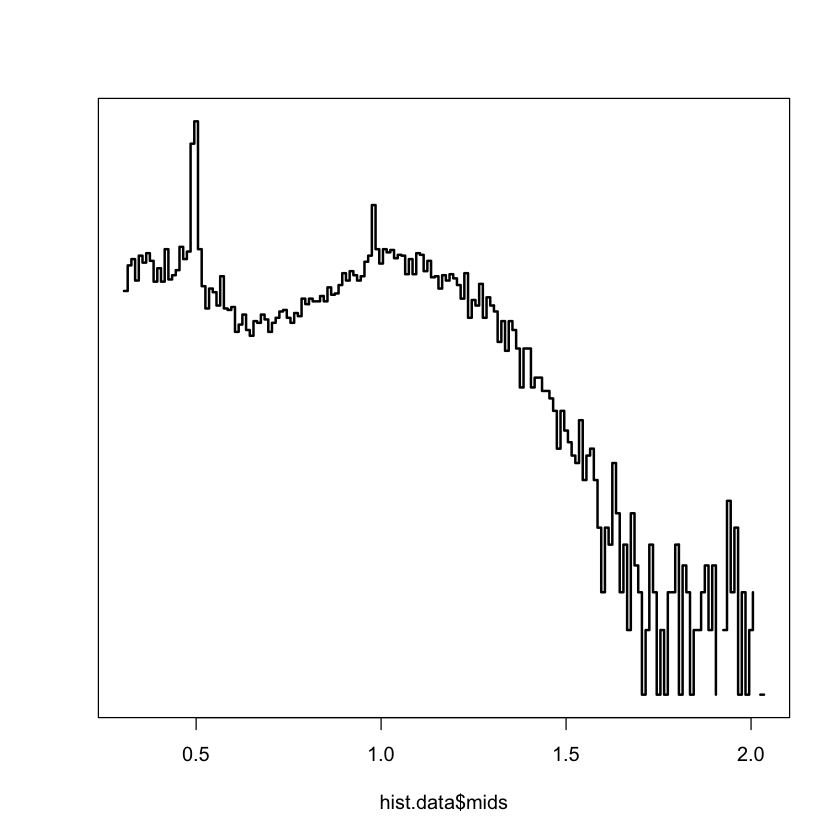

In [2]:
# which is not bad on its own

# however, another way to draw is to take the data from the hist and show it like this:
plot(hist.data$mids, log10(hist.data$counts), type="s", yaxt="n", ylab="", col="black", lwd=2)

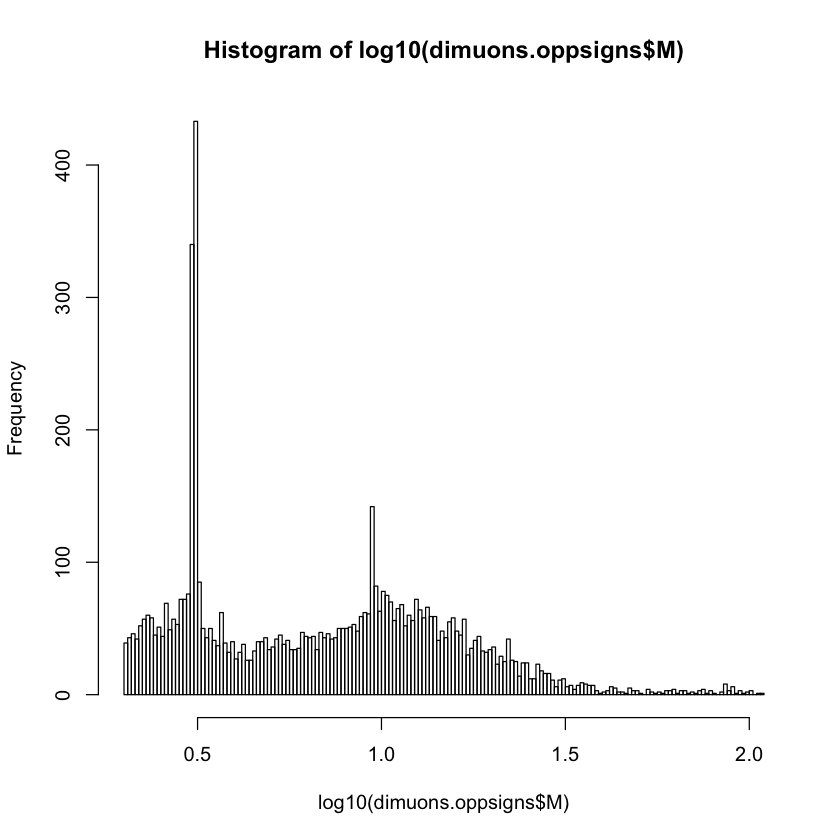

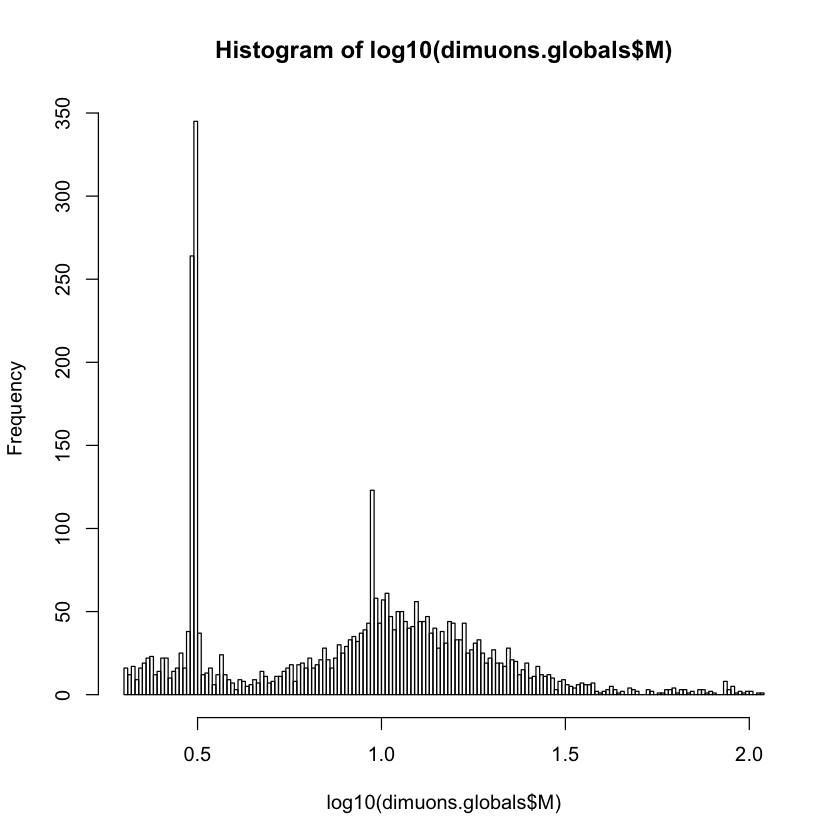

In [3]:
# let's make histograms of the selections:
hist.oppsigns.data <- hist(log10(dimuons.oppsigns$M), breaks=nbins)
hist.globals.data <- hist(log10(dimuons.globals$M),  breaks=nbins)

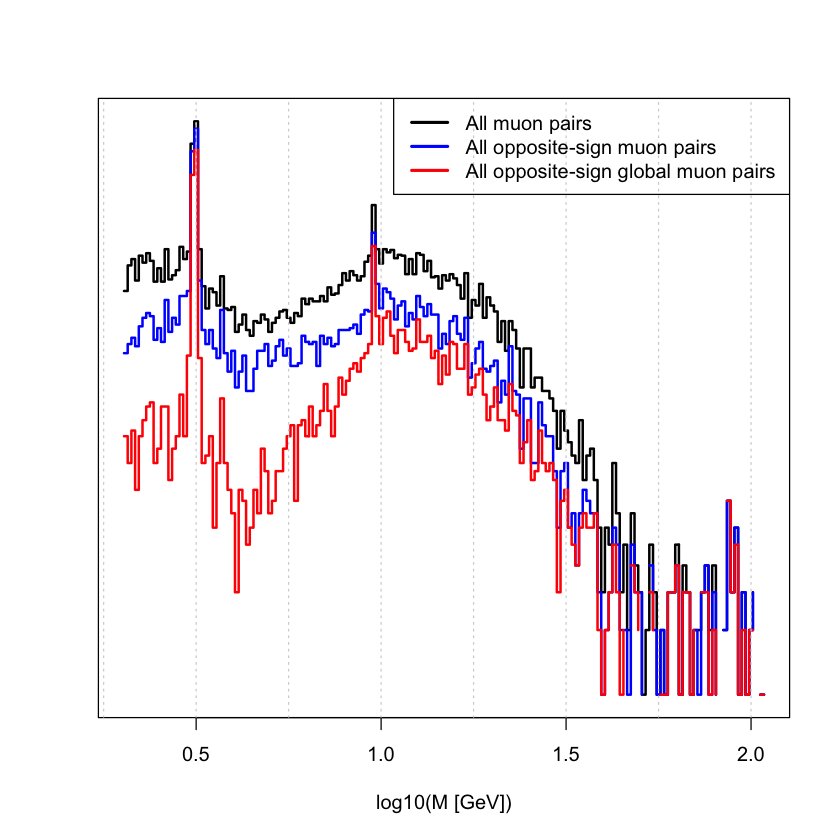

In [4]:
# and plot all 3 histograms:

plot(hist.data$mids, log10(hist.data$counts), xlab="log10(M [GeV])", yaxt="n", ylab="", type="s", col="black", lwd=2)
lines(hist.oppsigns.data$mids, log10(hist.oppsigns.data$counts),type="s", col="blue", lwd=2)
lines(hist.globals.data$mids, log10(hist.globals.data$counts), type="s", col="red", lwd=2)

# add some vertical grid lines
abline(v=(c(0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0)), col="lightgray", lty="dotted")

# and a legend
legend.txt = c("All muon pairs", "All opposite-sign muon pairs", "All opposite-sign global muon pairs")
legend("topright", legend.txt, lwd=c(2.5,2.5,2.5),col=c("black","blue","red"))